# Introduction
### The purpose of this project is to evaluate the diamond price. The dataset is from BlueNile website. I will focus on the round diamonds between 0.7 - 5.3 carat

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,accuracy_score

# Section 1: Data Wrangling
### Step 1: Read HAR files downloaded from BlueNile website and extract the diamonds features data

In [2]:
#Define a function that can load HAR files and extract the diamond features we need
def get_data(file_name):
    new_data=[]
    
    #Initialize multiple empty lists for the diamond features
    carat = []
    price = []
    id_ = []
    shape = []
    clarity = []
    color = []
    culet = [] 
    cut = []
    depth = []
    fluorescence = []
    lxwRatio = []
    polish = []
    symmetry = []
    table = []
    
    #Open HAR files downloaded from Bluenile website
    data = json.load(open(file_name))
    
    #Find all the diamond feature data in XHR
    for xhr in data['log']['entries']:
        if xhr['request']['url'].find('startIndex')>-1:
            xhr_js = json.loads(xhr['response']['content']['text'])
            new_data.extend(xhr_js['results'])
    #print('Data exported')
    
    #Extract each diamond feature and store in different lists
    for i in new_data:
        id_.append(i['id'])
        carat.append(float(i['carat'][0]))
        price.append(int(i['price'][0].strip('$').replace(',','')))
        shape.append(i['shapeName'][0])
        clarity.append(i['clarity'][0])
        color.append(i['color'][0])
        culet.append(i['culet'][0])
        cut.append(i['cut'][0]['label'])
        depth.append(float(i['depth'][0]))
        fluorescence.append(i['fluorescence'][0])
        lxwRatio.append(float(i['lxwRatio'][0]))
        polish.append(i['polish'][0])
        symmetry.append(i['symmetry'][0])
        table.append(float(i['table'][0]))
    #print('Diamonds details exported')
    
    #Create a dataframe for the diamond features
    df = pd.DataFrame({'price': price,'carat': carat,'id_': id_,'shape': shape,
                   'clarity': clarity,'color': color,'culet': culet,'cut': cut,
                   'depth': depth,'fluorescence': fluorescence,'lxwRatio': lxwRatio,
                   'polish': polish,'symmetry': symmetry,'table': table})
    
    return df

### Step 2: Concatenate the dataframes and drop the duplicates

In [3]:
#Get the data we need from HAR files and export to dataframe
file_names = pd.read_csv('/Users/yan/Desktop/TDI/capstone_project/file_names.csv').values.tolist()
frames = []
for i in file_names:
    frames.append(get_data(i[0]))
df = pd.concat(frames)
diamonds = df.drop_duplicates(subset=['id_'])

In [4]:
#export to csv
diamonds.to_csv('diamonds_data.csv', inde)

# Section 2: Diamond Data Analysis

In [2]:
diamonds = pd.read_csv('/Users/yan/Desktop/TDI/capstone_project/diamonds_data.csv')

In [3]:
diamonds['price_log'] = np.log(diamonds['price'])

### Data Description
We have 57,535 round diamonds with 4 numerical features and 7 categorical features, which cover 0.7 carat to 5.3 carat. Price range is USD1,322 to USD 551,437.

In [28]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57532 entries, 0 to 57531
Data columns (total 15 columns):
price           57532 non-null int64
carat           57532 non-null float64
id_             57532 non-null object
shape           57532 non-null object
clarity         57532 non-null object
color           57532 non-null object
culet           57532 non-null object
cut             57532 non-null object
depth           57532 non-null float64
fluorescence    57532 non-null object
lxwRatio        57532 non-null float64
polish          57532 non-null object
symmetry        57532 non-null object
table           57532 non-null float64
price_log       57532 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 6.6+ MB


In [29]:
diamonds.describe()

,price,carat,depth,lxwRatio,table,price_log
count,57532.000000,57532.000000,57532.000000,57532.000000,57532.000000,57532.000000
mean,9596.136394,1.113858,62.507008,1.008373,58.096623,8.732969
std,14821.729672,0.564529,1.601313,0.004874,2.027188,0.819730
min,1322.000000,0.700000,32.500000,1.000000,50.000000,7.186901
25%,3330.000000,0.780000,61.700000,1.010000,57.000000,8.110728
50%,5710.000000,1.000000,62.500000,1.010000,58.000000,8.649974
75%,9586.250000,1.100000,63.200000,1.010000,59.000000,9.168085
max,294240.000000,5.300000,71.200000,1.060000,79.000000,12.592151


### Price vs. Numerical Features

### Histogram
Below is the distributions for price and 4 numerical features

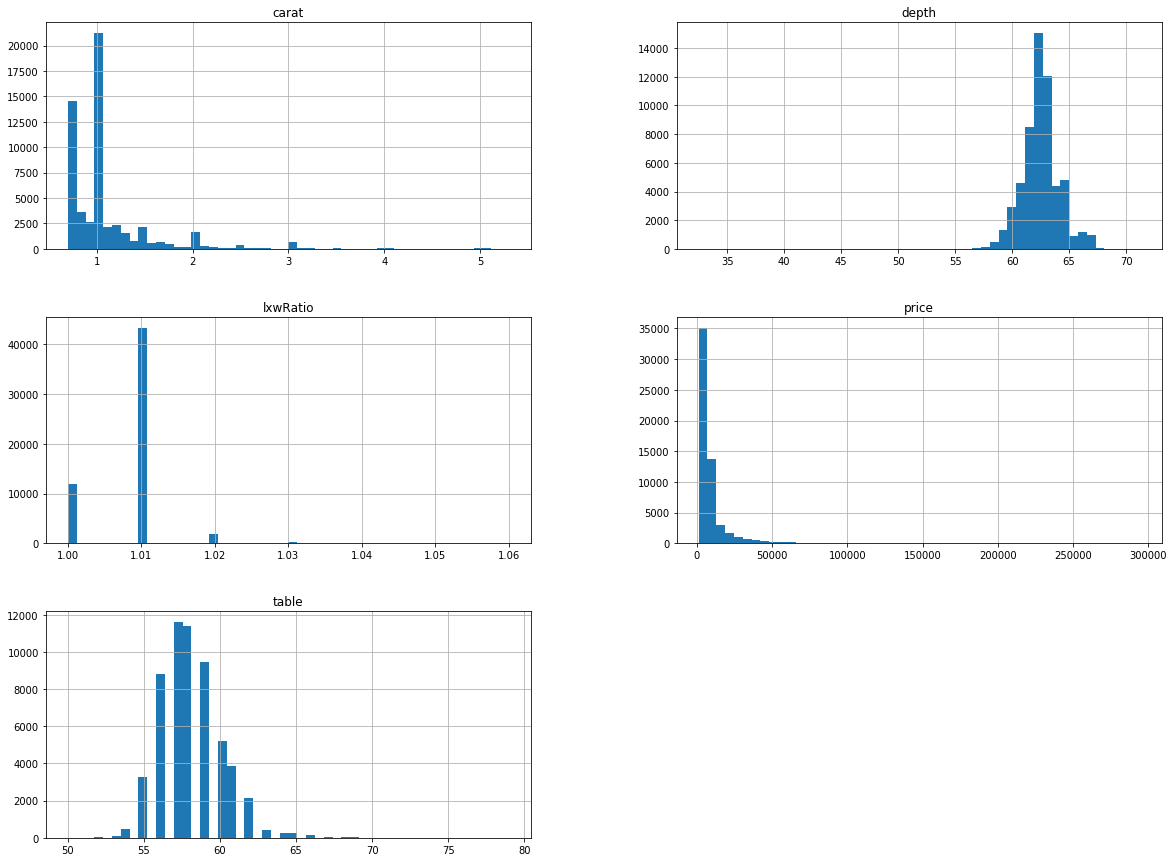

In [7]:
diamonds.hist(bins=50,figsize=(20,15))
plt.show()

### Heatmap
Let's look at the correlation matrix using the heatmap below. We can see carat has the stronge positive correlation with price.

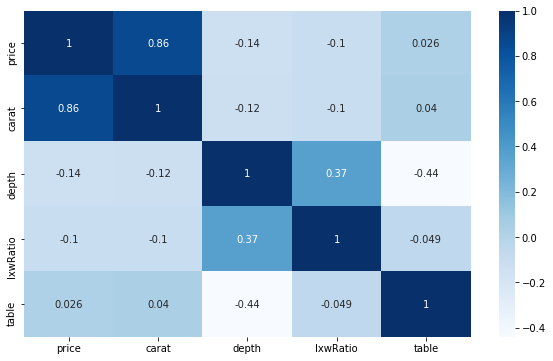

In [6]:
plt.figure(figsize = (10,6))
sns.heatmap(diamonds.corr(),annot=True, cmap="Blues")

### Pairplot
Plotting pairwise relationships, we can find that carat and price are positive correlated; the diamonds having around 61 in depth and 57 in table tend to have a higher price.

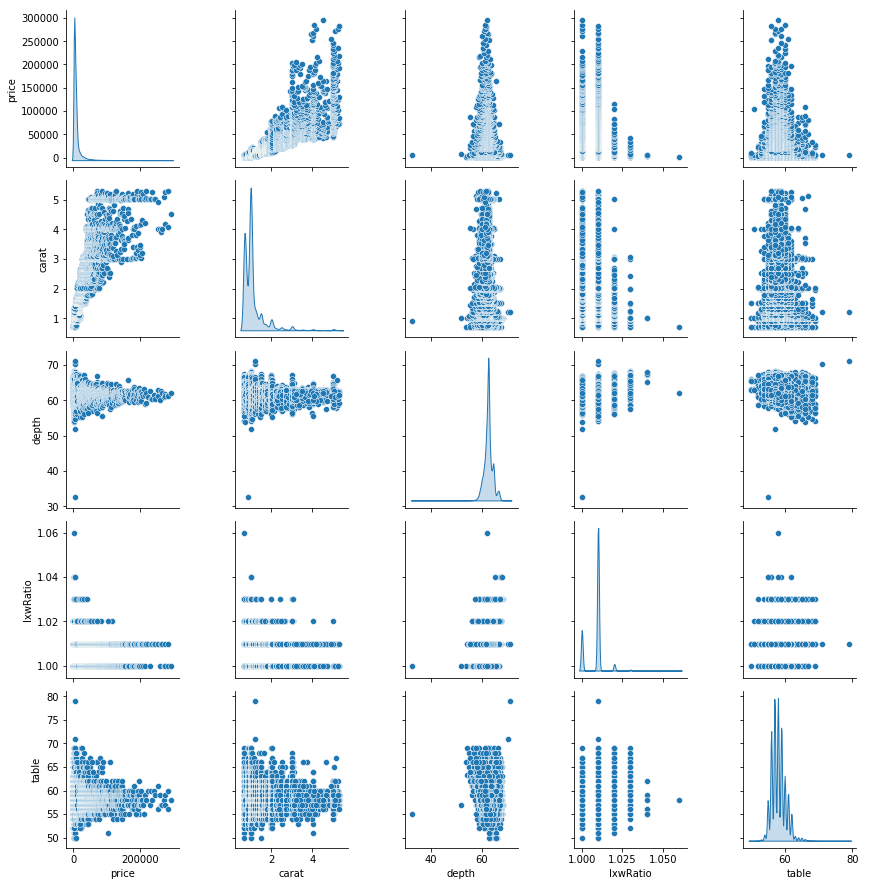

In [56]:
sns.pairplot(diamonds , diag_kind = 'kde');
plt.savefig("pairplot.png")

### Scatterplot with regression line
Below scatterplot also indicates the positive correlation between carat and price. Especially for the diamonds within 2 carat, carat can explain price well. While for the diamonds larger than 2 carat, there are more and more outliners. in other words, carat alone cannot explain price well.

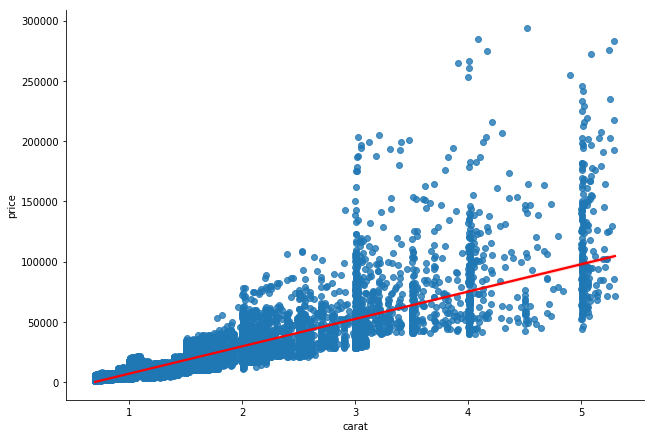

In [9]:
sns.lmplot(x="carat", y="price", data=diamonds, height=6, aspect=1.5,line_kws={'color': 'red'})

### Price vs. Categorical Features

### Scatterplot with regression line
When we look at the relationship between carat and price by different color, we can find that the diamonds with higher color ranking have a stronger positive correlation between carat and price(line is skewer)

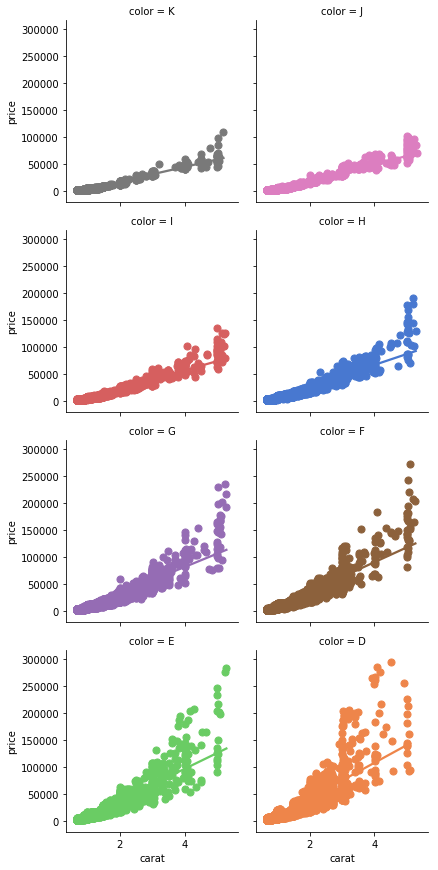

In [13]:
color_ranking = ['K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']
sns.lmplot(x="carat", y="price", col="color", hue="color", 
           col_order = color_ranking, data=diamonds,
           col_wrap=2, ci=None, palette="muted", height=3,
           scatter_kws={"s": 50, "alpha": 1})

### Scatterplot with multiple semantics
Per below scatterplot, we can see when the carat become larger, the diamonds with higher color ranking are much expensive than the the diamonds with lower color ranking.

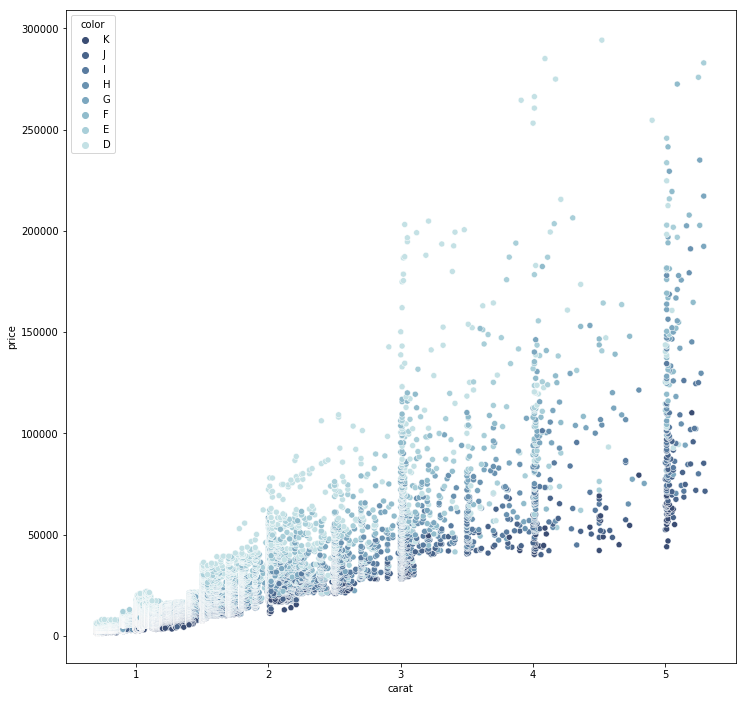

In [14]:
plt.figure(figsize = (12,12))
color_ranking = ['K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']
sns.scatterplot(x="carat", y="price",hue="color",palette="ch:r=-.2,d=.3_r", hue_order = color_ranking,data=diamonds)

### Scatterplot with regression line
When we look at the relationship between carat and price by different clarity, we can find that the diamonds with higher clarity ranking have a stronger positive correlation between carat and price(line is skewer)

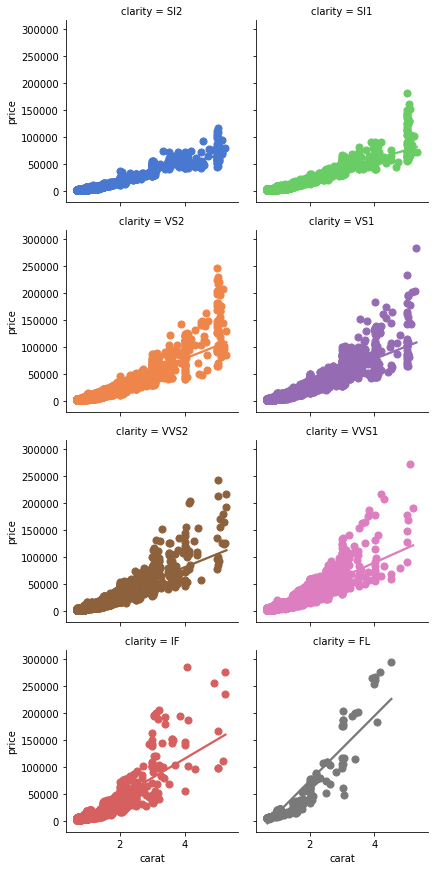

In [15]:
clarity_ranking = ['SI2', 'SI1', 'VS2', 'VS1','VVS2', 'VVS1', 'IF', 'FL']
sns.lmplot(x="carat", y="price", col="clarity", hue="clarity", col_order = clarity_ranking, data=diamonds,
           col_wrap=2, ci=None, palette="muted", height=3,
           scatter_kws={"s": 50, "alpha": 1})

### Scatterplot with multiple semantics
Per below scatterplot, we can see when the carat become larger, the diamonds with higher clarity ranking are much expensive than the the diamonds with lower color ranking.

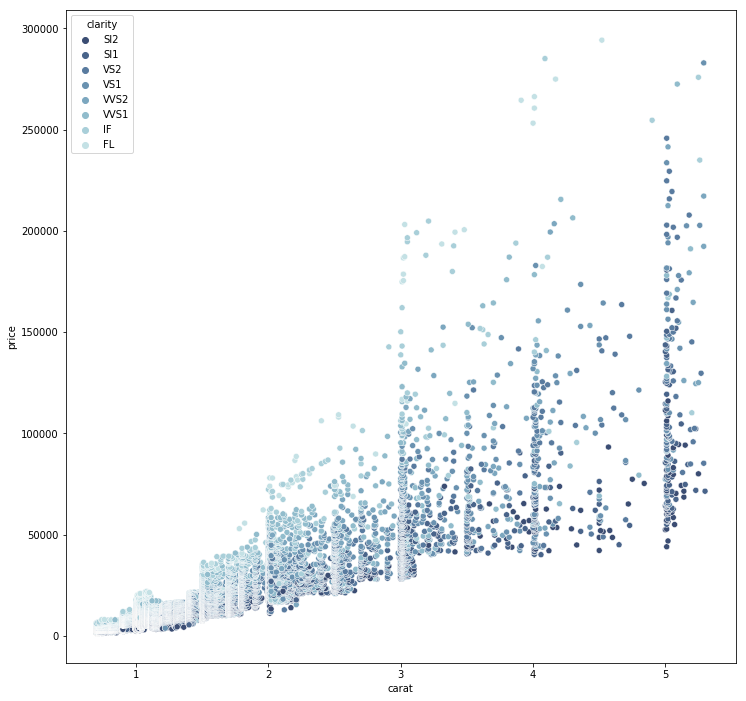

In [16]:
plt.figure(figsize = (12,12))
clarity_ranking = ['SI2', 'SI1', 'VS2', 'VS1','VVS2', 'VVS1', 'IF', 'FL']
sns.scatterplot(x="carat", y="price",hue="clarity",palette="ch:r=-.2,d=.3_r", hue_order = clarity_ranking,data=diamonds)

### Boxplot


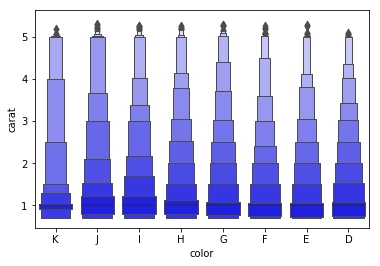

In [17]:
color_ranking = ['K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']

sns.boxenplot(x='color', y="carat",
              color="b", order=color_ranking,
              scale="linear", data=diamonds)

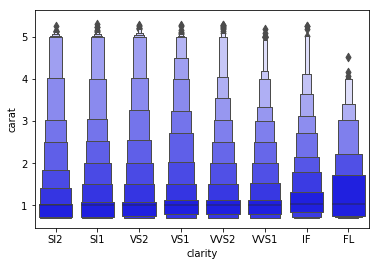

In [18]:
clarity_ranking = ['SI2', 'SI1', 'VS2', 'VS1','VVS2', 'VVS1', 'IF', 'FL']

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)

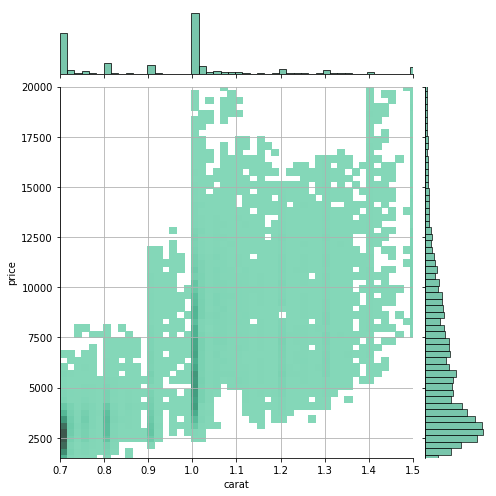

In [19]:
g = sns.jointplot(x="carat", y="price", data=diamonds,
                  kind="hist", 
                  xlim=(0.7, 1.5), ylim=(1500, 20000),
                  color="#4CB391", height=7)

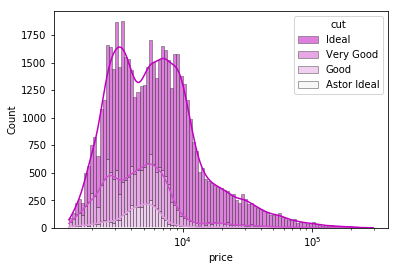

In [20]:

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    color = 'steeblue',
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,kde=True
)


# Train test split

In [8]:
from sklearn.model_selection import train_test_split

diamonds_cleaned = diamonds
diamonds_cleaned.drop(columns=['id_', 'shape'], inplace = True)

#Random split the data into train set and test set
train, test = train_test_split(diamonds_cleaned, test_size=0.1, random_state=10)

#Define X and Y in train set and test set
train_X = train.loc[:,'carat':'table']
train_Y = train['price_log']
test_X = test.loc[:,'carat':'table']
test_Y = test['price_log']

In [8]:
test.head()

,price,carat,clarity,color,culet,cut,depth,fluorescence,lxwRatio,polish,symmetry,table,price_log
25686,5623,1.00,SI1,H,None,Ideal,63.1,Faint,1.01,Excellent,Very Good,58.0,8.634621
17398,4465,0.80,VVS2,E,None,Ideal,62.9,None,1.01,Excellent,Excellent,58.0,8.404024
31527,10276,1.00,VS1,E,None,Very Good,63.9,None,1.01,Very Good,Very Good,57.0,9.237566
40604,5965,1.03,SI1,D,None,Ideal,62.0,Strong,1.01,Excellent,Excellent,59.0,8.693664
31736,11485,1.00,IF,F,None,Ideal,63.0,None,1.01,Excellent,Very Good,57.0,9.348797


In [22]:
train[train['culet']=='Large']

,price,carat,id_,shape,clarity,color,culet,cut,depth,fluorescence,lxwRatio,polish,symmetry,table
11936,3483,0.74,LD13159616,Round,VS1,H,Large,Good,59.1,None,1.01,Very Good,Good,56.0


/Users/yan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


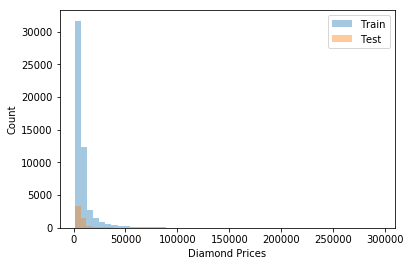

In [23]:
sns.distplot(train_Y, label='Train', kde=False)
sns.distplot(test_Y, label='Test', kde=False)
plt.xlabel('Diamond Prices')
plt.ylabel('Count')
plt.legend()

# Model Selection: 
- Using ColumnTransformer to select the features we need
- Using OneHotEncoder to encode categorical features (including cut, color, clarity etc.)
- Using three different models(including KNN, RandomForest, XGB) to train our data.
- Using GridSearch to find the parameter we are going to use for each model
- Using three different models to fit and predict the diamond price, and show the performance of the models

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
#Using ColumnTransformer to 
#transform the numerical features using MinMaxScaler
#and encode the categorical features using OneHotEncoder
categorical_columns = ['clarity', 'color', 'culet','cut', 'fluorescence', 'polish', 'symmetry']
numerical_columns = ['carat','depth', 'lxwRatio', 'table']
features_all = ColumnTransformer([
    ('numerical_columns', MinMaxScaler(), numerical_columns),
    ('categorical_columns', OneHotEncoder(), categorical_columns)
])

In [22]:
#Randomly select 50% of the trainset data for GridSearch
data_gs = train[(train['culet']!='Large') & (train['culet']!='Slightly Large')
                &(train['fluorescence']!='Medium Yellow')&(train['fluorescence']!='Strong Yellow')]
gs_train, gs_test = train_test_split(data_gs, test_size=0.5, random_state=123)
gs_X = gs_train.loc[:,'carat': 'table']
gs_Y = gs_train['price_log']

In [14]:
gs_train.shape

(25883, 13)

## KNN

In [23]:
cv_test_errors_knn = []
n_neighbors = [1,10,50,200,500]

for i in n_neighbors:
    pipe_knn = Pipeline([
    ('features_all', features_all),
    ('knn', KNeighborsRegressor(n_neighbors = i))
    ])
    est = pipe_knn
    cv_test_error = -cross_val_score(
        est,
        gs_X,
        gs_Y,
        cv=3,
        scoring='neg_mean_absolute_error'
    )
    cv_test_errors_knn.append(cv_test_error.mean())


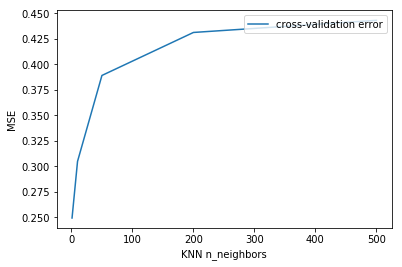

In [24]:
plt.plot(n_neighbors, cv_test_errors_knn, label='cross-validation error')
plt.xlabel('KNN n_neighbors')
plt.ylabel('MSE')
plt.legend(loc='upper right');

In [27]:
from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor(n_neighbors = 1)

model_knn = Pipeline([
    ('features_all', features_all),
    ('regressor', reg_knn)
])

model_knn.fit(train_X,train_Y)

Pipeline(steps=[('features_all',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  MinMaxScaler(),
                                                  ['carat', 'depth', 'lxwRatio',
                                                   'table']),
                                                 ('categorical_columns',
                                                  OneHotEncoder(),
                                                  ['clarity', 'color', 'culet',
                                                   'cut', 'fluorescence',
                                                   'polish', 'symmetry'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=1))])

In [28]:
test_Y_pred_knn = model_knn.predict(test_X)
#Print out RMSE, MAE and R^2
print('RMSE: ', np.sqrt(mean_squared_error(test_Y, test_Y_pred_knn)))
print('MAE: ', mean_absolute_error(test_Y, test_Y_pred_knn))
print('R2: ', r2_score(test_Y, test_Y_pred_knn))

RMSE:  0.33548118309431707
MAE:  0.1767135289161873
R2:  0.8388417167746133


## RandomForest

In [32]:
cv_test_errors_forest = []
n_estimators = [1,10,50,120,200,500]

for i in n_estimators:
    pipe_forest = Pipeline([
    ('features_all', features_all),
    ('knn', ensemble.RandomForestRegressor(n_estimators = i))
    ])
    est = pipe_forest
    cv_test_error = -cross_val_score(
        est,
        gs_X,
        gs_Y,
        cv=3,
        scoring='neg_mean_absolute_error'
    )
    cv_test_errors_forest.append(cv_test_error.mean())


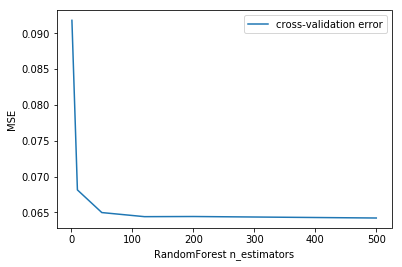

In [33]:
plt.plot(n_estimators, cv_test_errors_forest, label='cross-validation error')
plt.xlabel('RandomForest n_estimators')
plt.ylabel('MSE')
plt.legend(loc='upper right');

In [34]:
reg_forest = ensemble.RandomForestRegressor(n_estimators = 50)

model_forest = Pipeline([
    ('features_all', features_all),
    ('regressor', reg_forest)
])

model_forest.fit(train_X,train_Y)

Pipeline(steps=[('features_all',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  MinMaxScaler(),
                                                  ['carat', 'depth', 'lxwRatio',
                                                   'table']),
                                                 ('categorical_columns',
                                                  OneHotEncoder(),
                                                  ['clarity', 'color', 'culet',
                                                   'cut', 'fluorescence',
                                                   'polish', 'symmetry'])])),
                ('regressor', RandomForestRegressor(n_estimators=50))])

In [35]:
test_Y_pred_forest = model_forest.predict(test_X)
#Print out RMSE, MAE and R^2
print('RMSE: ', np.sqrt(mean_squared_error(test_Y, test_Y_pred_forest)))
print('MAE: ', mean_absolute_error(test_Y, test_Y_pred_forest))
print('R2: ', r2_score(test_Y, test_Y_pred_forest))

RMSE:  0.08204405809522793
MAE:  0.06012746512038684
R2:  0.9903614752379578


## Hyperparameter tuning - XGBoost

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
cv_test_errors_xgb1 = []
n_estimators_list = [100,200,800,1600,3200,6400]

for i in n_estimators_list:
    pipe_xgb = Pipeline([
    ('features_all', features_all),
    ('xgb', XGBRegressor(n_estimators = i, verbosity = 0))
    ])
    est = pipe_xgb
    cv_test_error = -cross_val_score(
        est,
        gs_X,
        gs_Y,
        cv=3,
        scoring='neg_mean_absolute_error'
    )
    cv_test_errors_xgb1.append(cv_test_error.mean())


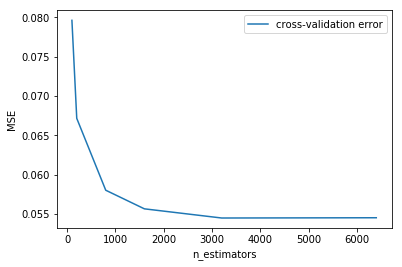

In [29]:
plt.plot(n_estimators_list, cv_test_errors_xgb1, label='cross-validation error')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend(loc='upper right');

In [31]:
cv_test_errors_xgb2 = []
max_depth_list = range(2,10)

for i in max_depth_list:
    pipe_xgb = Pipeline([
    ('features_all', features_all),
    ('xgb', XGBRegressor(max_depth = i, n_estimators = 3200, verbosity = 0))
    ])
    est = pipe_xgb
    cv_test_error = -cross_val_score(
        est,
        gs_X,
        gs_Y,
        cv=3,
        scoring='neg_mean_absolute_error'
    )
    cv_test_errors_xgb2.append(cv_test_error.mean())

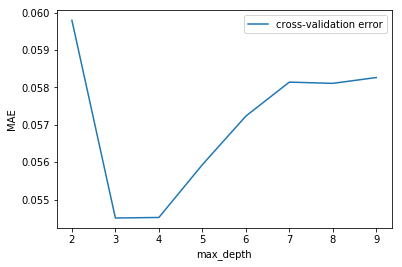

In [32]:
plt.plot(max_depth_list, cv_test_errors_xgb2, label='cross-validation error')
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.legend(loc='upper right');

In [33]:
cv_test_errors_xgb3 = []
subsample_list = [0.55, 0.6,0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

for i in subsample_list:
    pipe_xgb = Pipeline([
    ('features_all', features_all),
    ('xgb', XGBRegressor(subsample = i, max_depth = 3, n_estimators = 3200, verbosity = 0))
    ])
    est = pipe_xgb
    cv_test_error = -cross_val_score(
        est,
        gs_X,
        gs_Y,
        cv=3,
        scoring='neg_mean_absolute_error'
    )
    cv_test_errors_xgb3.append(cv_test_error.mean())

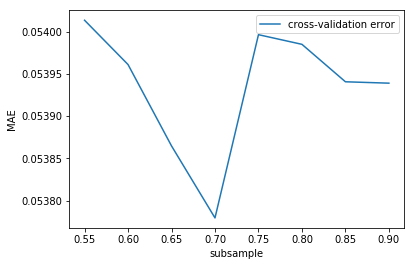

In [34]:
plt.plot(subsample_list, cv_test_errors_xgb3, label='cross-validation error')
plt.xlabel('subsample')
plt.ylabel('MAE')
plt.legend(loc='upper right');

In [35]:
cv_test_errors_xgb4 = []
learning_rate_list = [0.001, 0.002, 0.005, 0.008, 0.01, ]

for i in learning_rate_list:
    pipe_xgb = Pipeline([
    ('features_all', features_all),
    ('xgb', XGBRegressor(learning_rate = i, subsample = 0.70, max_depth = 3, n_estimators = 3200, verbosity = 0))
    ])
    est = pipe_xgb
    cv_test_error = -cross_val_score(
        est,
        gs_X,
        gs_Y,
        cv=3,
        scoring='neg_mean_absolute_error'
    )
    cv_test_errors_xgb4.append(cv_test_error.mean())

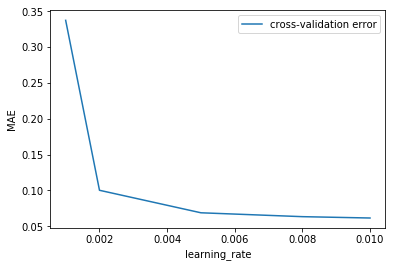

In [36]:
plt.plot(learning_rate_list, cv_test_errors_xgb4, label='cross-validation error')
plt.xlabel('learning_rate')
plt.ylabel('MAE')
plt.legend(loc='upper right');

In [38]:
cv_test_errors_xgb5 = []
colsample_bytree_list = [0.05, 0.1, 0.2, 0.4, 0.8]

for i in colsample_bytree_list:
    pipe_xgb = Pipeline([
    ('features_all', features_all),
    ('xgb', XGBRegressor(colsample_bytree = i, learning_rate = 0.005, subsample = 0.70, max_depth = 3, n_estimators = 3200, verbosity = 0))
    ])
    est = pipe_xgb
    cv_test_error = -cross_val_score(
        est,
        gs_X,
        gs_Y,
        cv=3,
        scoring='neg_mean_absolute_error'
    )
    cv_test_errors_xgb5.append(cv_test_error.mean())

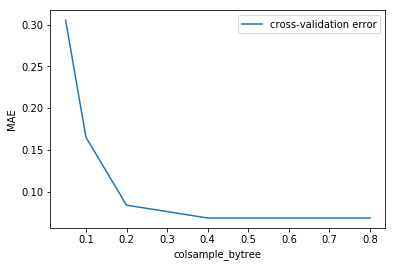

In [39]:
plt.plot(colsample_bytree_list, cv_test_errors_xgb5, label='cross-validation error')
plt.xlabel('colsample_bytree')
plt.ylabel('MAE')
plt.legend(loc='upper right');

In [44]:
cv_test_errors_xgb6 = []
max_depth_list = range(3,11)

for i in max_depth_list:
    pipe_xgb = Pipeline([
    ('features_all', features_all),
    ('xgb', XGBRegressor(max_depth = i, colsample_bytree = 0.4, learning_rate = 0.005, subsample = 0.70, n_estimators = 3200, verbosity = 0))
    ])
    est = pipe_xgb
    cv_test_error = -cross_val_score(
        est,
        gs_X,
        gs_Y,
        cv=3,
        scoring='neg_mean_absolute_error'
    )
    cv_test_errors_xgb6.append(cv_test_error.mean())

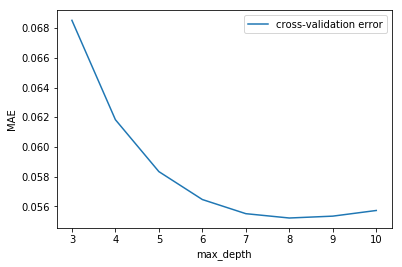

In [46]:
plt.plot(max_depth_list, cv_test_errors_xgb6, label='cross-validation error')
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.legend(loc='upper right');

In [37]:
reg_xgb = XGBRegressor(n_estimators=3200, max_depth=8, subsample=0.70, learning_rate=0.005, colsample_bytree=0.4, verbosity = 0)

model_sgb = Pipeline([
    ('features_all', features_all),
    ('regressor', reg_xgb)
])

model_sgb.fit(train_X,train_Y)

Pipeline(steps=[('features_all',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  MinMaxScaler(),
                                                  ['carat', 'depth', 'lxwRatio',
                                                   'table']),
                                                 ('categorical_columns',
                                                  OneHotEncoder(),
                                                  ['clarity', 'color', 'culet',
                                                   'cut', 'fluorescence',
                                                   'polish', 'symmetry'])])),
                ('regressor',
                 XGBRegressor(colsample_bytree=0.4, learning_rate=0.005,
                              max_depth=8, n_estimators=3200, subsample=0.7,
                              verbosity=0))])

In [39]:
test_Y_pred_sgb = model_sgb.predict(test_X)
#Print out RMSE, MAE and R^2
print('RMSE: ', np.sqrt(mean_squared_error(test_Y, test_Y_pred_sgb)))
print('MAE: ', mean_absolute_error(test_Y, test_Y_pred_sgb))
print('MAPE: ', mean_absolute_percentage_error(test_Y, test_Y_pred_sgb))
print('R2: ', r2_score(test_Y, test_Y_pred_sgb))

RMSE:  0.0722646779463714
MAE:  0.05304745770945868
MAPE:  0.0060820772806343595
R2:  0.9925222930092888


In [23]:
test_Y_pred_sgb = model_sgb.predict(test_X)
#Print out MAE and R^2
print('MAE: ', mean_absolute_error(np.exp(test_Y), np.exp(test_Y_pred_sgb)))
print('MAPE: ', mean_absolute_percentage_error(np.exp(test_Y), np.exp(test_Y_pred_sgb)))

RMSE:  2467.4030900861208
MAE:  662.4100539731531
MAPE:  0.054843648681314756
R2:  0.9771246986422228


### Model Comparasion
XGBoost is the final model because it generated the lowest MAE among these three models
- KNN MAE:  0.1767
- RandomForest MAE:  0.0601
- XGBoost MAE:  0.0530

In [14]:
import pickle
pickle.dump(model_sgb, open("model.pkl","wb"))

Text(0.5, 1.0, 'XGBoost Model Performance')

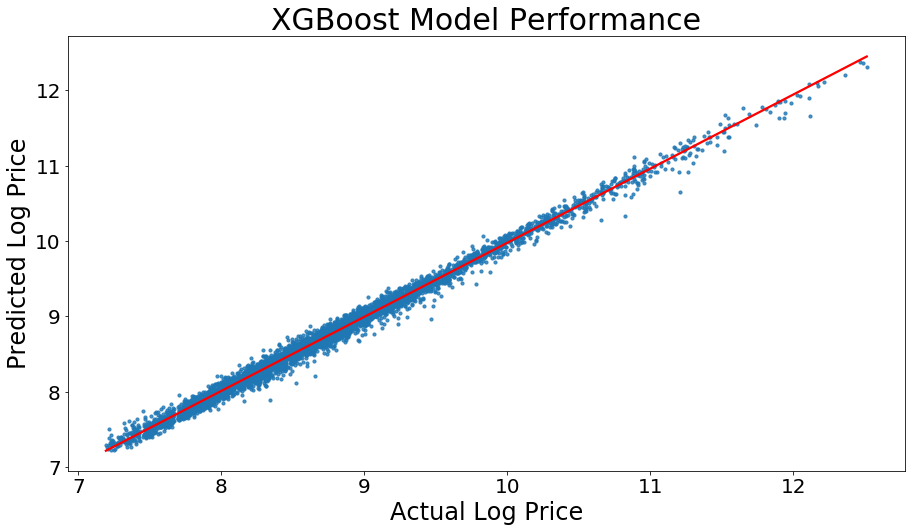

In [42]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig = sns.regplot(test_Y, test_Y_pred_sgb, scatter_kws={'s':10}, line_kws={"color": "red"})
fig.set_xlabel('Actual Log Price',fontsize=24)
fig.set_ylabel('Predicted Log Price',fontsize=24)
fig.set_title("XGBoost Model Performance", fontsize=30)